In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [2]:
# membaca file csv menggunakan pandas
df = pd.read_csv('../data/Iris.csv')
#cetak header data (5 baris data) dari file 
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Preprocess

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

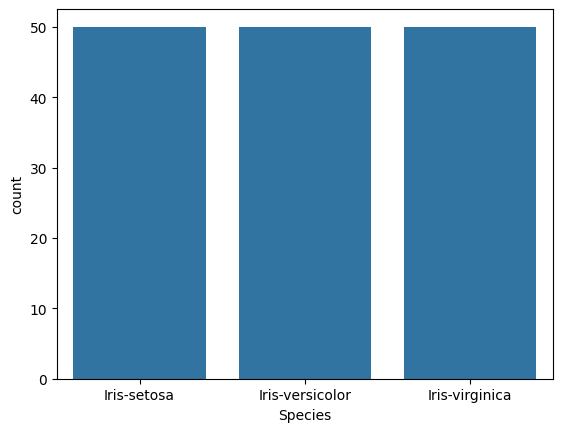

In [5]:
sns.countplot(x='Species', data=df)
plt.show()

In [6]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Modelling

### Feature selection

In [7]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
le = LabelEncoder()
df["SpeciesEncoded"] = le.fit_transform(df["Species"])

### Cek distribusi data

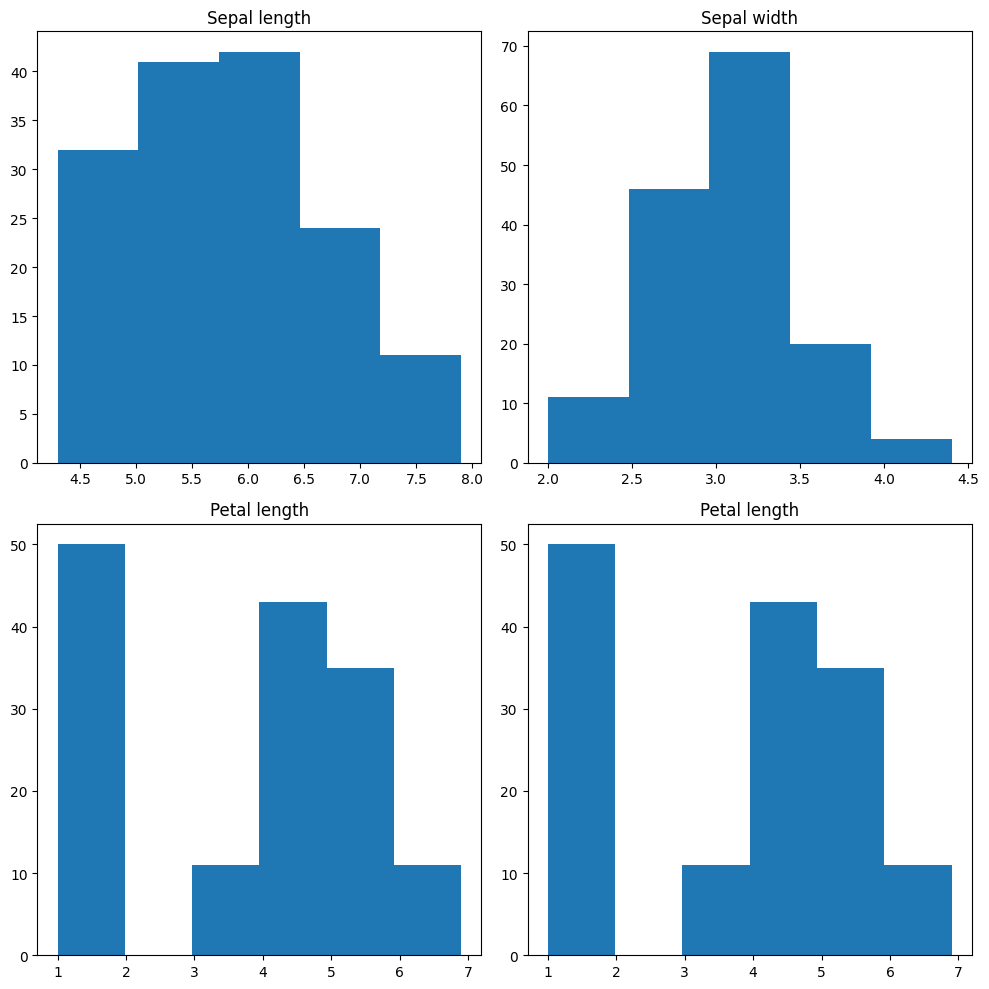

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

axes[0, 0].set_title("Sepal length")
axes[0, 0].hist(X['SepalLengthCm'], bins=5)

axes[0, 1].set_title("Sepal width")
axes[0, 1].hist(X['SepalWidthCm'], bins=5)

axes[1, 0].set_title("Petal length")
axes[1, 0].hist(X['PetalLengthCm'], bins=6)

axes[1, 1].set_title("Petal length")
axes[1, 1].hist(X['PetalLengthCm'], bins=6)

plt.tight_layout()
plt.show()

### Normalisasi data

In [10]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

### Elbow method

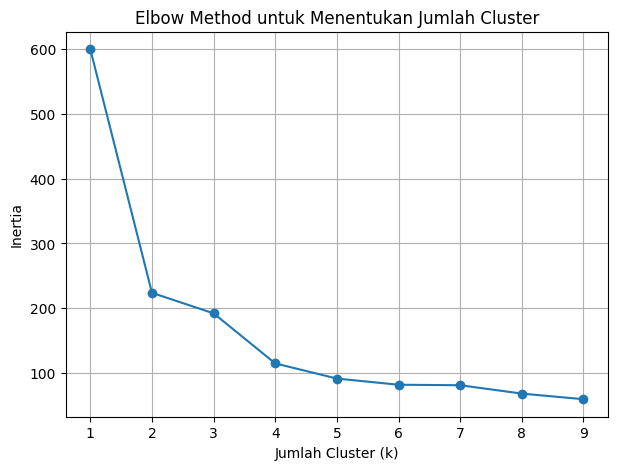

In [11]:
inertia_list = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia_list.append(km.inertia_)

plt.figure(figsize=(7, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method untuk Menentukan Jumlah Cluster")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

### Latih model

In [12]:
kmeans = KMeans(
    n_clusters = 3,
    init = 'k-means++',
    random_state = 42
)

kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [13]:
# prediksi cluster
labels = kmeans.predict(X)

In [14]:
df["Cluster"] = labels

In [15]:
# df["Cluster"] = kmeans.fit(X)

print("Cluster ditemukan", df["Cluster"].unique())

Cluster ditemukan [1 2 0]


# Eval

In [16]:
sil_score = silhouette_score(X, df["Cluster"])
print("\n===== Silhouette Score =====")
print("Silhouette Score", sil_score)


===== Silhouette Score =====
Silhouette Score 0.4787241921049546


In [18]:
print("\n===== Confusion Matrix =====")
cm = confusion_matrix(df["SpeciesEncoded"], df["Cluster"])
print(cm)


===== Confusion Matrix =====
[[ 0 32 18]
 [46  0  4]
 [50  0  0]]


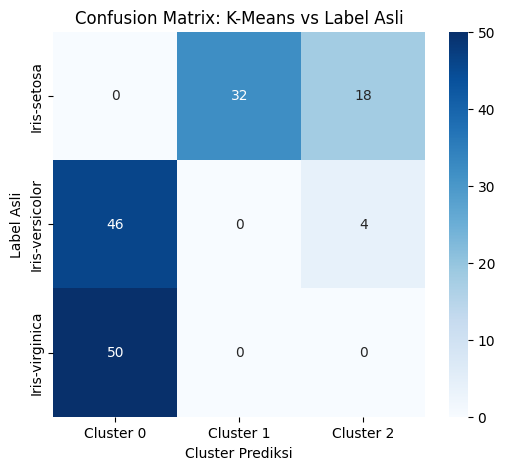

In [19]:
plt.figure(figsize=(6,5))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
    yticklabels=le.classes_
)

plt.title("Confusion Matrix: K-Means vs Label Asli")
plt.xlabel("Cluster Prediksi")
plt.ylabel("Label Asli")
plt.show()

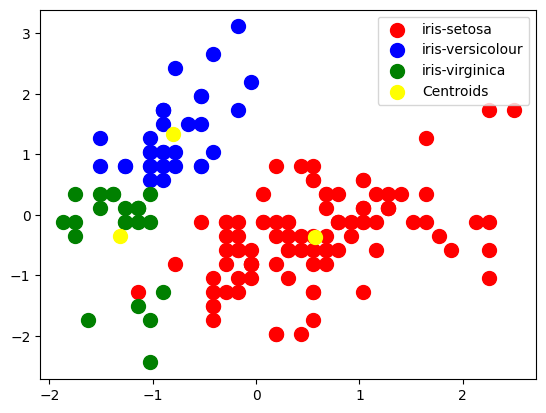

In [20]:
plt.scatter(X[df["Cluster"] == 0, 0], X[df["Cluster"] == 0, 1], s = 100, c = 'red', label = 'iris-setosa')
plt.scatter(X[df["Cluster"] == 1, 0], X[df["Cluster"] == 1, 1], s = 100, c = 'blue', label = 'iris-versicolour')
plt.scatter(X[df["Cluster"] == 2, 0], X[df["Cluster"] == 2, 1], s = 100, c = 'green', label = 'iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c= 'yellow', label = 'Centroids')

plt.legend()

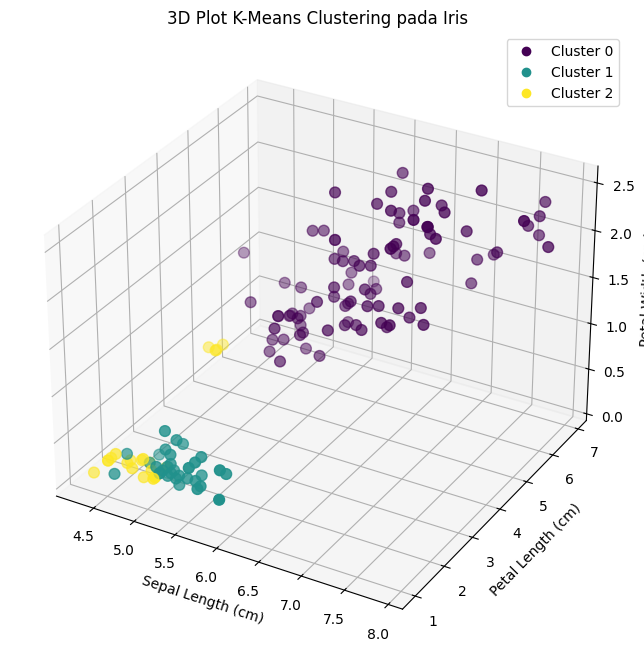

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df ["SepalLengthCm"], df ["PetalLengthCm"],
    df ["PetalWidthCm"],
    c=df["Cluster"],
    s = 60
)

ax.set_title("3D Plot K-Means Clustering pada Iris")
ax.set_xlabel("Sepal Length (cm)")
ax.set_ylabel("Petal Length (cm)")
ax.set_zlabel("Petal Width (cm)")

# Legend cluster
legend_labels = [f"Cluster {i}" for i in range(3)]
ax.legend (handles=scatter.legend_elements()[0], labels=legend_labels)

plt.show()